In [72]:
# demonstrate k-means clustering using the scikit learn package

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [107]:
data = pd.read_csv('diabetes+130-us+hospitals+for+years+1999-2008/diabetic_data.csv')

In [75]:
data

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [79]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

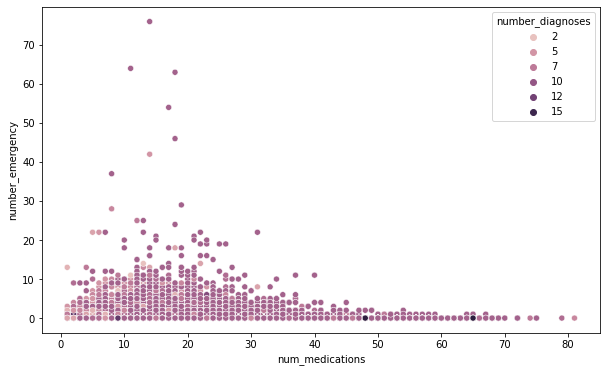

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = data, x = 'num_medications', y = 'number_emergency', hue = 'number_diagnoses')
plt.show()

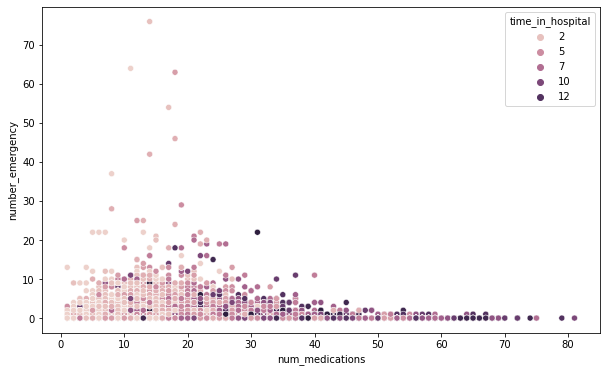

In [81]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = data, x = 'num_medications', y = 'number_emergency', hue = 'time_in_hospital')
plt.show()

In [110]:
#Splitting the data set 
X_train, X_test, y_train, y_test = train_test_split(data[['num_medications', 'number_emergency']], \
                                                    data[['time_in_hospital']], test_size=0.2, random_state=0)

#Normalizing the training and testing data
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [111]:
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init=10)
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

[]

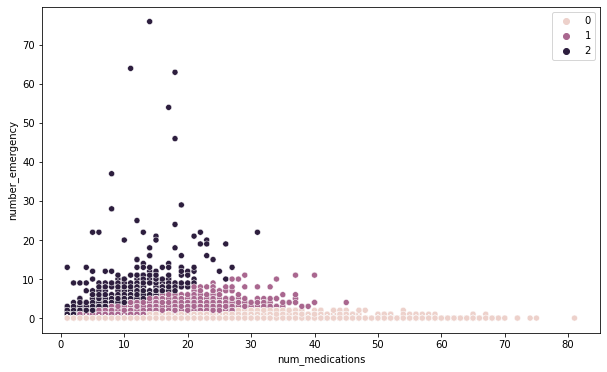

In [112]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = X_train, x = 'num_medications', y = 'number_emergency', hue = kmeans.labels_)
plt.plot()

<AxesSubplot:ylabel='time_in_hospital'>

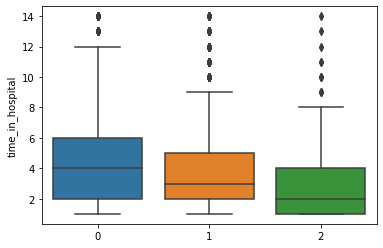

In [86]:
sns.boxplot(x = kmeans.labels_, y = y_train['time_in_hospital'])

In [87]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.9208322939233935

In [88]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init=10).fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

In [95]:
K = range(2, 8)
sse = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_norm)  # Replace X_train_norm with your dataset
    sse.append(kmeans.inertia_)  # 'inertia_' gives the SSE

print(sse)

[119.01328512998639, 54.030350517464385, 29.52649050088828, 18.09549909638516, 12.280214931154104, 8.682586211634092]


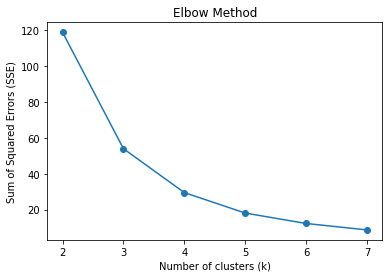

In [96]:
plt.plot(K, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()

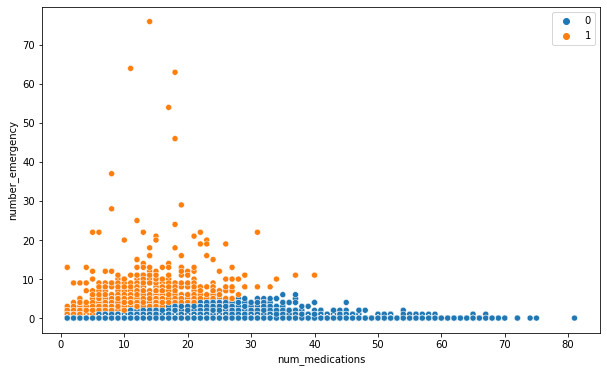

In [89]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = X_train, x = 'num_medications', y = 'number_emergency', hue = fits[0].labels_)
plt.show()

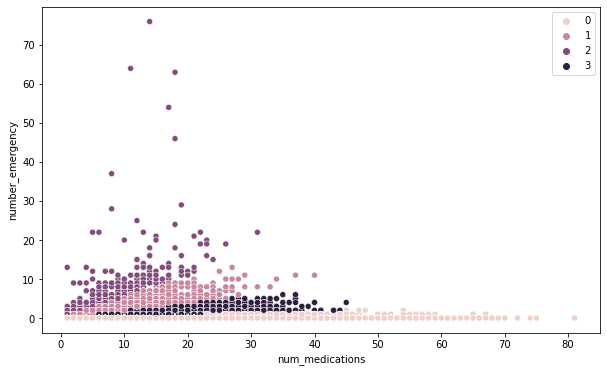

In [90]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = X_train, x = 'num_medications', y = 'number_emergency', hue = fits[2].labels_)
plt.show()

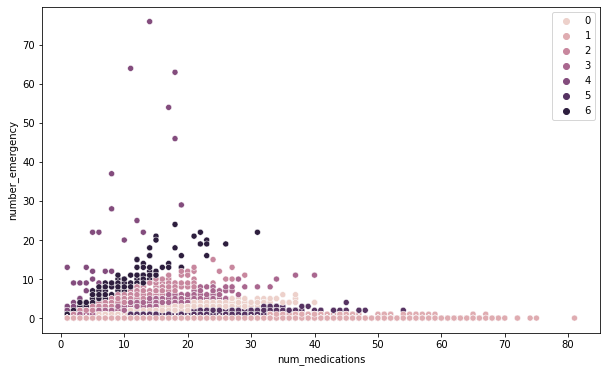

In [91]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = X_train, x = 'num_medications', y = 'number_emergency', hue = fits[5].labels_)
plt.show()

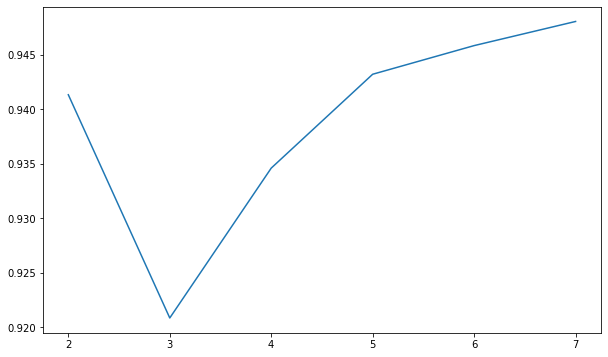

In [92]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = K, y = score)
plt.show()

In [ ]:
# from the elbow plot, 3 clusters is the best choice

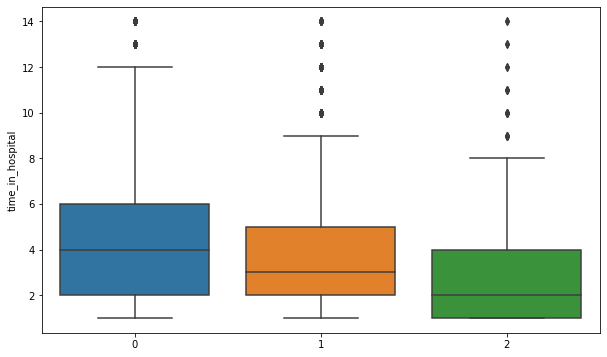

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = fits[1].labels_, y = y_train['time_in_hospital'])
plt.show()

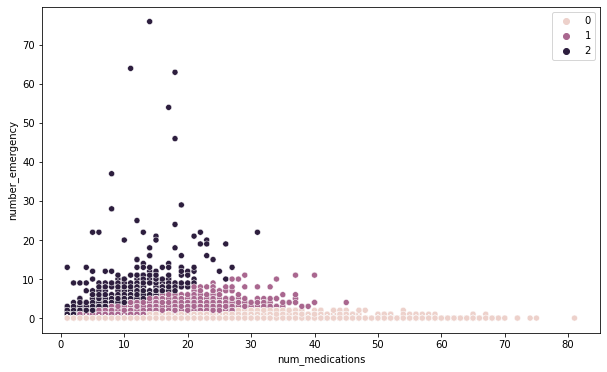

In [94]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data = X_train, x = 'num_medications', y = 'number_emergency', hue = fits[1].labels_)
plt.show()

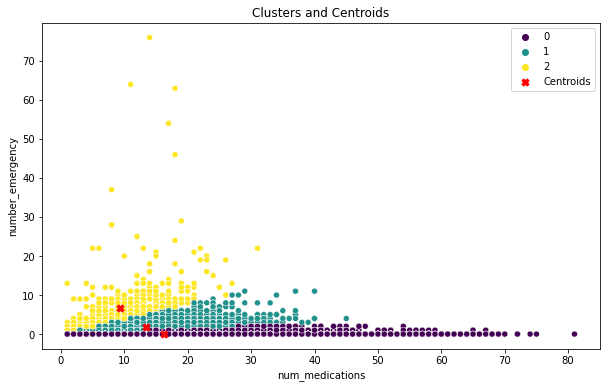

In [132]:
df1 = X_train[X_train['label'] == 0]
c1 = df1.mean(axis = 0)
df2 = X_train[X_train['label'] == 1]
c2 = df2.mean(axis = 0)
df3 = X_train[X_train['label'] == 2]
c3 = df3.mean(axis = 0)
centroids_custom = [
    [c1['num_medications'], c1['number_emergency']], 
    [c2['num_medications'], c2['number_emergency']], 
    [c3['num_medications'], c3['number_emergency']]
]
# Extract the x and y coordinates for the centroids
centroids_x = [c[0] for c in centroids_custom]  # num_medications
centroids_y = [c[1] for c in centroids_custom]  # number_emergency

# Plot the clusters and custom centroids
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=X_train, 
    x='num_medications', 
    y='number_emergency', 
    hue=fits[1].labels_, 
    palette='viridis', 
    legend='full'
)

# Plot the centroids
plt.scatter(
    centroids_x,
    centroids_y,
    s=50,
    c='red',
    marker='X',
    label='Centroids'
)

plt.legend()
plt.title('Clusters and Centroids')
plt.show()
